# One-body density for a particle in a system with 100 particles in 3 dimensions

### Extracting all the data into numpy arrays

In [3]:
file = open("Data/InteractingOneBodyDensity_100.txt", "r")

import matplotlib.pyplot as plt  
import numpy as np 

norms_interacting = np.array([float(i) for i in file])

In [4]:
file = open("Data/NonInteractingOneBodyDensity_1002.txt", "r")

import matplotlib.pyplot as plt 
import numpy as np 

norms_non_interacting = np.array([float(i) for i in file])

### Scatter plots of the histogram-bins and a polynomial fit of the data points to see the trends in the data. 

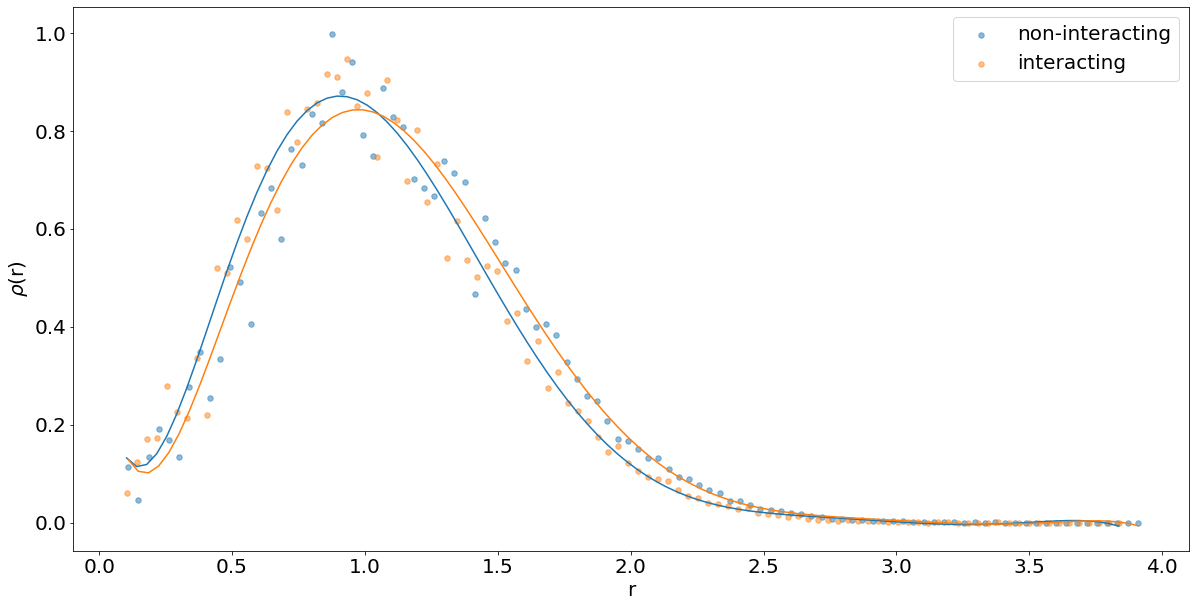

In [5]:
plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["font.size"] = 20


n = 100
polyfit_degree = 8
num_samples = len(norms_interacting)

interacting_hist, interacting_bins = np.histogram(norms_interacting, bins = n)
x_interacting = np.linspace(interacting_bins[0], interacting_bins[-1],n)
bin_width = interacting_bins[1] - interacting_bins[0]
normalization_factor =  num_samples*bin_width

interacting_hist= interacting_hist/normalization_factor
# plt.scatter(x_interacting, interacting_hist)
z1 = np.polyfit(x_interacting, interacting_hist, polyfit_degree)
p1 = np.poly1d(z1)


non_interacting_hist, non_interacting_bins = np.histogram(norms_non_interacting, bins = n)
# print(bins)
non_interacting_hist = non_interacting_hist/normalization_factor
x_non_interacting = np.linspace(non_interacting_bins[0], non_interacting_bins[-1],n)
z2 = np.polyfit(x_non_interacting, non_interacting_hist, polyfit_degree)
p2 = np.poly1d(z2)

plt.scatter(x_non_interacting, non_interacting_hist, alpha = 0.5, s=30)
plt.scatter(x_interacting, interacting_hist, alpha=0.5, s=30)
plt.legend(["non-interacting","interacting" ])

plt.plot(x_interacting, p1(x_interacting))
plt.plot(x_non_interacting, p2(x_non_interacting))

plt.xlabel("r")
plt.ylabel(r"$\rho$(r)")

plt.savefig("Plots\oneBodyDensities100Particles.png")
